In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats
import os
import random
from mpl_toolkits.mplot3d import Axes3D
seed1=12
seed2=54

In [2]:
fileName="/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_859.root"
file=uproot.open(fileName)

In [3]:
file.keys()

['ticlNtuplizer;1',
 'ticlNtuplizer/tracksters;1',
 'ticlNtuplizer/clusters;1',
 'ticlNtuplizer/graph;1',
 'ticlNtuplizer/candidates;1',
 'ticlNtuplizer/trackstersMerged;1',
 'ticlNtuplizer/associations;1',
 'ticlNtuplizer/simtrackstersSC;1',
 'ticlNtuplizer/simtrackstersCP;1',
 'ticlNtuplizer/tracks;1']

In [4]:
file['ticlNtuplizer/associations'].keys()


['tsCLUE3D_recoToSim_SC',
 'tsCLUE3D_recoToSim_SC_score',
 'tsCLUE3D_simToReco_SC',
 'tsCLUE3D_simToReco_SC_score',
 'tsCLUE3D_recoToSim_SC_sharedE',
 'tsCLUE3D_recoToSim_CP',
 'tsCLUE3D_recoToSim_CP_score',
 'tsCLUE3D_simToReco_CP',
 'tsCLUE3D_simToReco_CP_score',
 'tsCLUE3D_recoToSim_CP_sharedE',
 'Mergetstracksters_recoToSim_SC',
 'Mergetstracksters_recoToSim_SC_score',
 'Mergetstracksters_simToReco_SC',
 'Mergetstracksters_simToReco_SC_score',
 'Mergetstracksters_recoToSim_SC_sharedE',
 'Mergetracksters_recoToSim_CP',
 'Mergetracksters_recoToSim_CP_score',
 'Mergetracksters_simToReco_CP',
 'Mergetracksters_simToReco_CP_score',
 'Mergetracksters_recoToSim_CP_sharedE']

In [5]:
associations=file['ticlNtuplizer/associations']
recoToSim_SC=associations['tsCLUE3D_recoToSim_SC_score']

In [ ]:
plt.hist(ak.flatten(tracksters['raw_energy'].array()),bins=20,histtype="step")
plt.hist(ak.flatten(tracksters['regressed_energy'].array()),bins=20,histtype="step")

(array([ 4., 11.,  7., 14., 17., 21., 11., 20., 16.,  8., 16., 11., 19.,
        14., 13., 18., 13., 13.,  9.,  3.]),
 array([1.7747916, 1.8156067, 1.856422 , 1.8972371, 1.9380522, 1.9788674,
        2.0196826, 2.0604978, 2.1013129, 2.142128 , 2.182943 , 2.2237582,
        2.2645736, 2.3053887, 2.3462038, 2.387019 , 2.427834 , 2.4686491,
        2.5094645, 2.5502796, 2.5910947], dtype=float32),
 <a list of 1 Patch objects>)

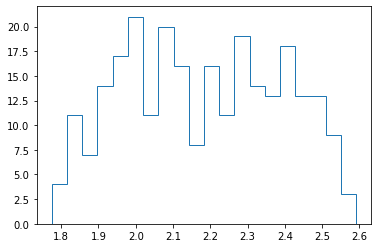

In [9]:
plt.hist(ak.flatten(tracksters['trackster_barycenter_eta'].array()),bins=20,histtype="step")

In [ ]:
file2=uproot.open("/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_1233.root")

In [ ]:
tracksters2=file2['ticlNtuplizer/tracksters']

In [ ]:
plt.hist(ak.flatten(tracksters2['raw_energy'].array()),bins=20,histtype="step")
plt.hist(ak.flatten(tracksters2['regressed_energy'].array()),bins=20,histtype="step")

In [2]:
#filenameBase="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/"

#filename="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/hgcalNtuple_*.root:ana/tracksters"
filenameFull100GeV="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
filenameFull50GeV="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
filenameFull25GeV="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225704/0000/ntuples.root"
folder="CloseByDoubleGamma_E50IncVsE25Com_Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4"
savefigs=False
#file = uproot.open(filename)
#fileFull=uproot.concatenate(filename)
file50=uproot.open(filenameFull100GeV)
file25=uproot.open(filenameFull50GeV)
datasetName="100 GeV data inc(layerCut) vs 50 GeV data com"

In [3]:
tracksters=file25["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()

tracksters_50=file50["ana/tracksters"]
vertices_E_50 = tracksters_50['vertices_energy'].array()
vertices_indexes_50 = tracksters_50['vertices_indexes'].array()
vertices_x_50 = tracksters_50['vertices_x'].array()
vertices_y_50 = tracksters_50['vertices_y'].array()
vertices_z_50 = tracksters_50['vertices_z'].array()
vertices_layers_50=tracksters_50['vertices_layer'].array()
trackster_E_50=tracksters_50['raw_energy'].array()
trackster_phi_50=tracksters_50['trackster_barycenter_phi'].array()
trackster_eta_50=tracksters_50['trackster_barycenter_eta'].array()


In [70]:
print(len(vertices_layers[0,0])

SyntaxError: unexpected EOF while parsing (<ipython-input-70-054c74eb155f>, line 1)

In [4]:
inc_trackster_E=[]
inc_trackster_nVert=[]
for evt in range(len(vertices_E_50)):
    for tr in range(len(vertices_E_50[evt])):
        incSlice=fn.incompleteTracksters(vertices_layers_50[evt,tr],0.31,0.001)
        inc_vertices_E=vertices_E_50[evt,tr][incSlice]
        inc_trackster_E.append(ak.sum(inc_vertices_E))
        inc_vertices=vertices_indexes_50[evt,tr][incSlice]
        inc_trackster_nVert.append(len(inc_vertices))

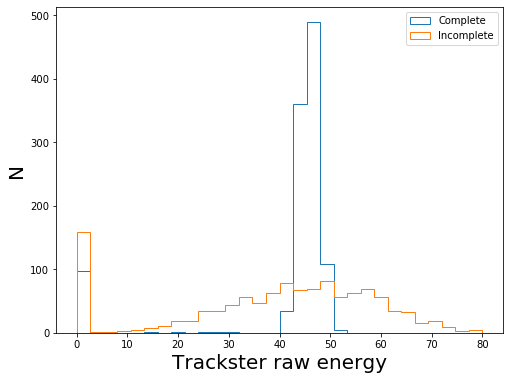

In [5]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.hist(ak.flatten(trackster_E),histtype="step",bins=30,range=(0,80),label="Complete")
plt.hist(inc_trackster_E,histtype="step",bins=30,range=(0,80),label="Incomplete")
plt.xlabel("Trackster raw energy",fontsize=20)
plt.ylabel("N",fontsize=20)
plt.legend()
plt.savefig("/eos/user/d/dmagdali/figures/"+"LayerCut_100vs50_TrRawEnergy.png")
#plt.show()

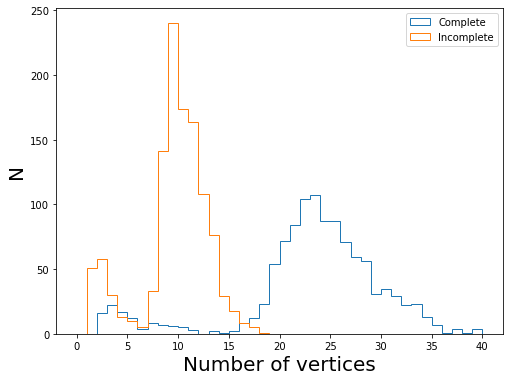

In [6]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=-1)),histtype="step",range=(0,40),bins=40,label="Complete")
plt.hist(inc_trackster_nVert,histtype="step",range=(0,40),bins=40,label="Incomplete")
plt.xlabel("Number of vertices",fontsize=20)
plt.ylabel("N",fontsize=20)
plt.legend()
plt.savefig("/eos/user/d/dmagdali/figures/"+"LayerCut_100vs50_NVert.png")
#plt.show(

In [6]:
def delta_Eta(vertices_x,vertices_y,vertices_z):
    theta=np.arctan(np.sqrt(vertices_x**2+vertices_y**2)/vertices_z)
    eta=-np.log(np.tan(theta/2))

    return eta

def delta_Phi(vertices_x,vertices_y):
    phi=np.arctan2(vertices_y,vertices_x)
    
    return phi

def delta_eta_phi(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-np.mean(Eta))**2+(Phi-np.mean(Phi))**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR)

def delta_eta_phi_EW(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi,vertices_E):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-np.mean(Eta))**2+(Phi-np.mean(Phi))**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR*vertices_E)/sum(vertices_E)

def delta_R(vertices_x,vertices_y,vertices_z,vertices_E,Eweighted=False):
    argmax_E=ak.argmax(vertices_E)
                       
    vEmax_x=vertices_x[argmax_E]
    vEmax_y=vertices_y[argmax_E]
    vEmax_z=vertices_z[argmax_E]
    RvEmax=np.sqrt(vEmax_x**2+vEmax_y**2+vEmax_z**2)
    
    R=np.sqrt(vertices_x**2+vertices_y**2+vertices_z**2)
    
    delta_R=np.mean(np.abs(R-RvEmax))
        
    return delta_R

def delta_RT(vertices_x,vertices_y,vertices_E,Eweighted=False):
    argmax_E=ak.argmax(vertices_E)
                       
    vEmax_x=vertices_x[argmax_E]
    vEmax_y=vertices_y[argmax_E]
    RvEmax=np.sqrt(vEmax_x**2+vEmax_y**2)
    
    R=np.sqrt(vertices_x**2+vertices_y**2)
    
    if(Eweighted):
        delta_R=np.mean(np.abs(R-RvEmax)*vertices_E/vertices_E[argmax_E])
    else:
        delta_R=np.mean(np.abs(R-RvEmax))
        
    return delta_R

In [33]:
comShowerShapes=[]

longestComPaths=[]


longestComPathsFirstNode=[]


comCenParams=[]


N = len(vertices_indexes)
#N_tr=10000
print(N)

for evt in range(N):
    for tr in range(min(len(vertices_indexes[evt]),2)):
        v_layers=vertices_layers[evt][tr]
        v_ind=vertices_indexes[evt][tr]
        v_x=vertices_x[evt][tr]
        v_y=vertices_y[evt][tr]
        v_z=vertices_z[evt][tr]
        v_E=vertices_E[evt][tr] 
        
        edges_1 = fn.edgeBuilderNew(
            v_ind,
            v_x, 
            v_y, 
            v_z, 
            v_E
        )
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        
        c_pr_dir=fn.nXCentralityPageRank(v_ind,edges_1,True)
        c_pr_undir=fn.nXCentralityPageRank(v_ind,edges_1,False)
        longestComPaths.append([fn.longestPathSource(v_ind,edges_1,c_pr_dir,True),
                                fn.longestPathSource(v_ind,edges_1,c_pr_undir),
                                fn.longestPathSource(v_ind,edges_1,c_pr_dir,True)/len(v_ind),
                                fn.longestPathSource(v_ind,edges_1,c_pr_undir)/len(v_ind)])

        longestComPathsFirstNode.append([fn.longestPathInitialNode(v_ind,edges_1,True),
                                         fn.longestPathInitialNode(v_ind,edges_1),
                                         fn.longestPathInitialNode(v_ind,edges_1,True)/len(v_ind),
                                         fn.longestPathInitialNode(v_ind,edges_1)/len(v_ind)])

        centrality=c_pr_dir
        comCenParams.append([np.mean(centrality),np.std(centrality)
                         ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])

        comShowerShapes.append([
            fn.ld(v_z,v_E),
            fn.sd(v_z,v_E),
            delta_R(v_x,v_y,v_z,v_E),
            delta_RT(v_x,v_y,v_E),
            delta_RT(v_x,v_y,v_E,True),
            ak.sum(v_E),
            fn.maxE_z(v_z,v_E),
            fn.maxAbsZ(v_z),
            fn.delta_RT_std(v_x,v_y,v_E)
            ,delta_eta_phi(v_x,v_y,v_z,trackster_eta[evt,tr],trackster_phi[evt,tr])
            ,delta_eta_phi_EW(v_x,v_y,v_z,trackster_eta[evt,tr],trackster_phi[evt,tr],v_E)
            ,delta_R(v_x,v_y,v_z,v_E)/len(v_ind)
        ])



500


In [34]:

incShowerShapes=[]
incCenParams=[]
longestInComPathsFirstNode=[]
longestInComPaths=[]

N = len(vertices_indexes_50)

for evt in range(N):
    for tr in range(min(len(vertices_indexes_50[evt]),2)):
        incSlice=fn.incompleteTracksters(vertices_layers_50[evt,tr],0.31,0.01)
        #print(incSlice)
        v_ind_inc=vertices_indexes_50[evt,tr][incSlice]
        v_x_inc=vertices_x_50[evt,tr][incSlice]
        v_y_inc=vertices_y_50[evt,tr][incSlice]
        v_z_inc=vertices_z_50[evt,tr][incSlice]
        v_E_inc=vertices_E_50[evt,tr][incSlice]
        #print(v_E_inc)
        edges_1 = fn.edgeBuilderNew(
            v_ind_inc,
            v_x_inc, 
            v_y_inc, 
            v_z_inc,
            v_E_inc
        )
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        if(len(v_ind_inc)<2):
            continue

        c_pr_dir=fn.nXCentralityPageRank(v_ind_inc,edges_1,True)
        c_pr_undir=fn.nXCentralityPageRank(v_ind_inc,edges_1,False)
        longestInComPaths.append([fn.longestPathSource(v_ind_inc,edges_1,c_pr_dir,True)
                                  ,fn.longestPathSource(v_ind_inc,edges_1,c_pr_undir)
                                  ,fn.longestPathSource(v_ind_inc,edges_1,c_pr_dir,True)/len(v_ind_inc)
                                  ,fn.longestPathSource(v_ind_inc,edges_1,c_pr_undir)/len(v_ind_inc)])

        longestInComPathsFirstNode.append([fn.longestPathInitialNode(v_ind_inc,edges_1,True),fn.longestPathInitialNode(v_ind_inc,edges_1)])

        centrality=c_pr_dir
        incCenParams.append([np.mean(centrality),np.std(centrality)
                         ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])

        incShowerShapes.append([
            fn.ld(v_z_inc,v_E_inc),
            fn.sd(v_z_inc,v_E_inc),
            delta_R(v_x_inc,v_y_inc,v_z_inc,v_E_inc),
            delta_RT(v_x_inc,v_y_inc,v_E_inc),
            delta_RT(v_x_inc,v_y_inc,v_E_inc,True),
            ak.sum(v_E_inc),
            fn.maxE_z(v_z_inc,v_E_inc),
            fn.maxAbsZ(v_z_inc),
            fn.delta_RT_std(v_x_inc,v_y_inc,v_E_inc)
            ,delta_eta_phi(v_x_inc,v_y_inc,v_z_inc,trackster_eta_50[evt,tr],trackster_phi_50[evt,tr])
            ,delta_eta_phi_EW(v_x_inc,v_y_inc,v_z_inc,trackster_eta_50[evt,tr],trackster_phi_50[evt,tr],v_E_inc)
            ,delta_R(v_x_inc,v_y_inc,v_z_inc,v_E_inc)/len(v_ind_inc)
        ])



In [35]:
comShowerShapes=np.asarray(comShowerShapes)
incShowerShapes=np.asarray(incShowerShapes)
longestComPaths=np.asarray(longestComPaths)
longestInComPaths=np.asarray(longestInComPaths)
longestComPathsFirstNode=np.asarray(longestComPathsFirstNode)
longestInComPathsFirstNode=np.asarray(longestInComPathsFirstNode)
comCenParams=np.asarray(comCenParams)
incCenParams=np.asarray(incCenParams)

In [10]:
def plotShowerShapes(completeShowerShapes,incompleteShowerShapes,xlabels,saveFileNames,bins=50):
    %matplotlib inline
    for i in range(len(completeShowerShapes[0])):
        plt.figure(figsize=(8,6))
        plt.hist(completeShowerShapes[:,i], histtype="step",bins=bins, color='b',label='Complete')
        plt.hist(incompleteShowerShapes[:,i], histtype="step",bins=bins, color='r',label='Incomplete')
        plt.legend()
        plt.ylabel("N",fontsize=20)
        plt.xlabel(xlabels[i],fontsize=20)
        plt.title(datasetName,fontsize=20)
        #plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
        #if(savefigs):
        #    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
        plt.show()

['incVsCom_ld', 'incVsCom_sd', 'incVsCom_delta_R', 'incVsCom_delta_RT', 'incVsCom_delta_RT_Eweighted', 'incVsCom_Total_energy', 'incVsCom_maxE_Z_position', 'incVsCom_maxium_Z_position', 'incVsCom_delta_R_std', 'incVsCom_delta_R', 'incVsCom_delta_R_EW']


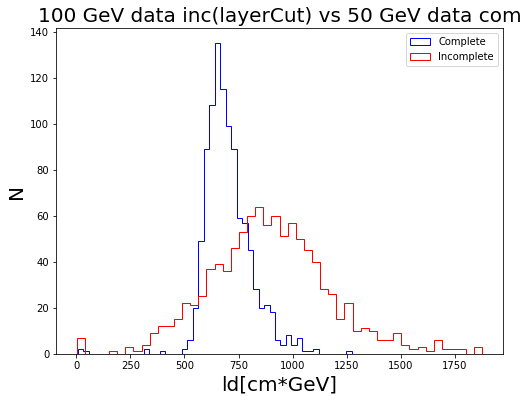

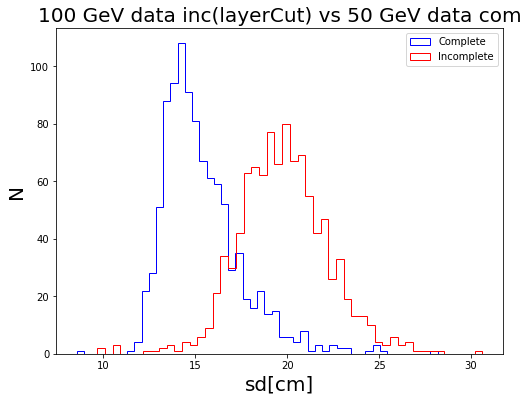

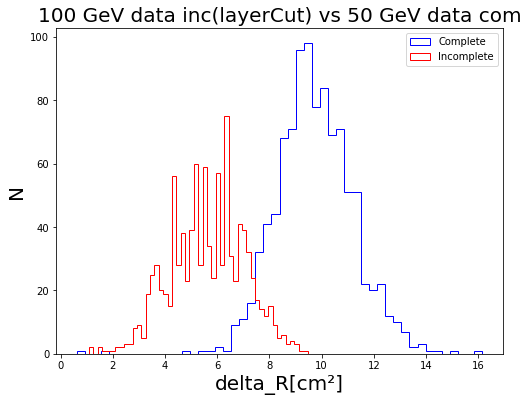

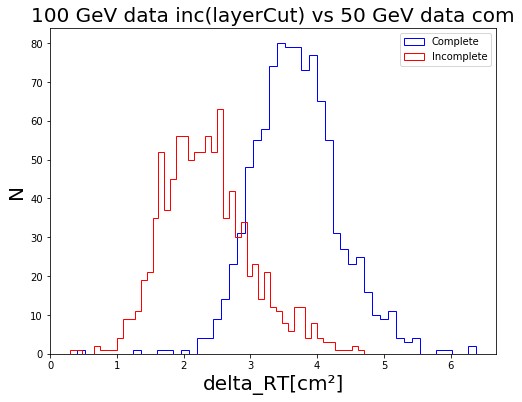

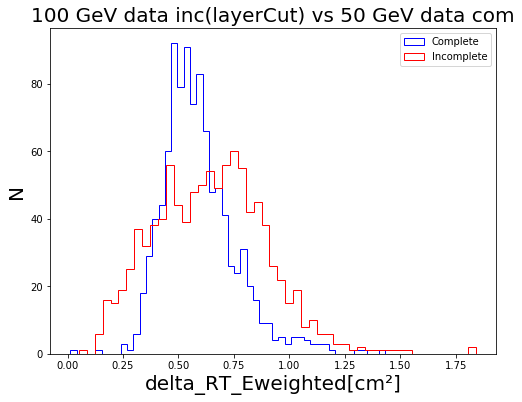

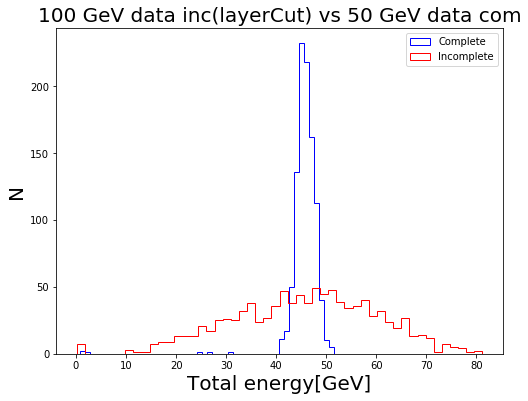

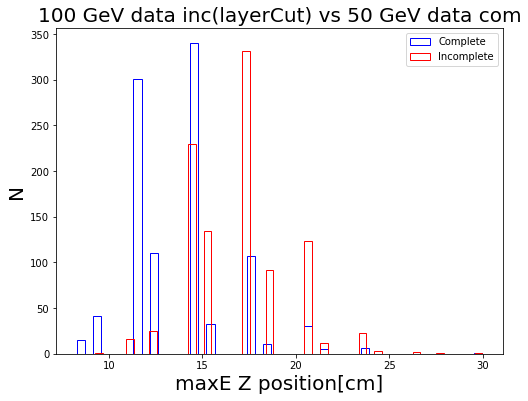

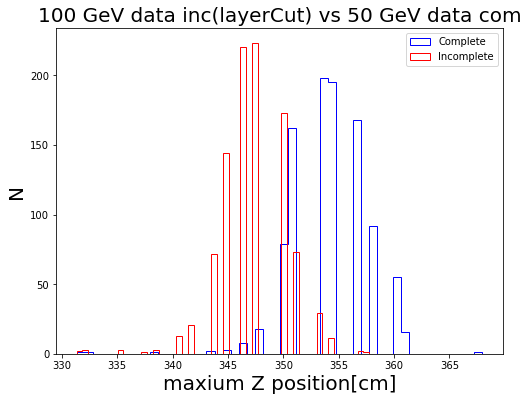

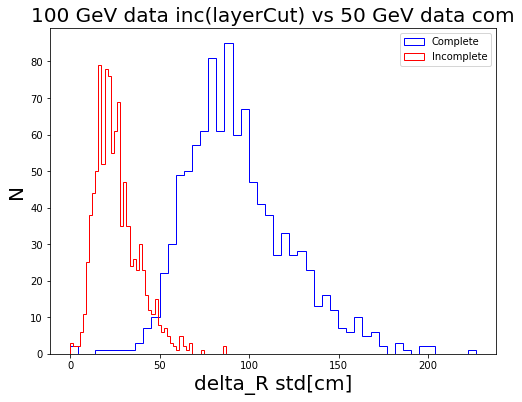

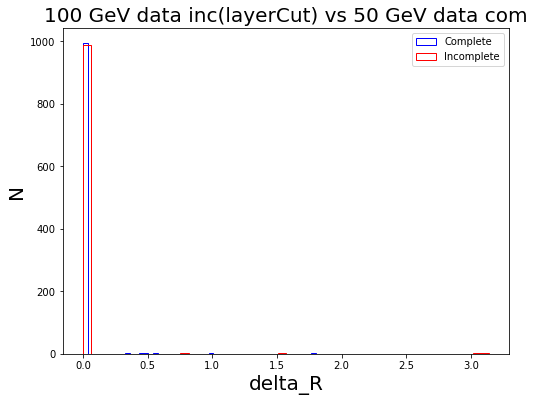

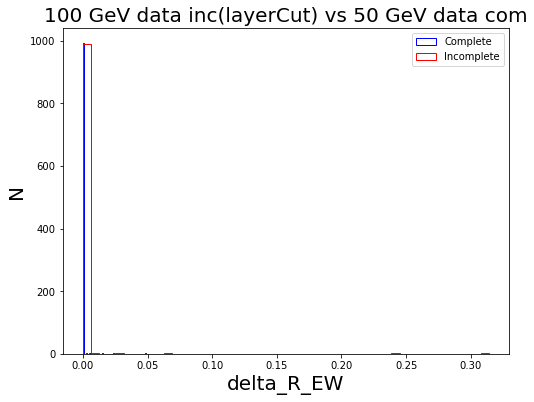

In [11]:
xlabels=["ld[cm*GeV]","sd[cm]","delta_R[cm²]","delta_RT[cm²]","delta_RT_Eweighted[cm²]","Total energy[GeV]","maxE Z position[cm]","maxium Z position[cm]","delta_R std[cm]","delta_R","delta_R_EW"]
xlabels2=["ld","sd","delta_R","delta_RT","delta_RT_Eweighted","Total energy","maxE Z position","maxium Z position","delta_R std","delta_R","delta_R_EW"]

newList=[("incVsCom_"+i.replace(" ","_")) for i in xlabels2]
print(newList)
#if not os.path.isdir("figures/"+folder):
#    os.makedirs("figures/"+folder)
plotShowerShapes(comShowerShapes,incShowerShapes,xlabels,newList)

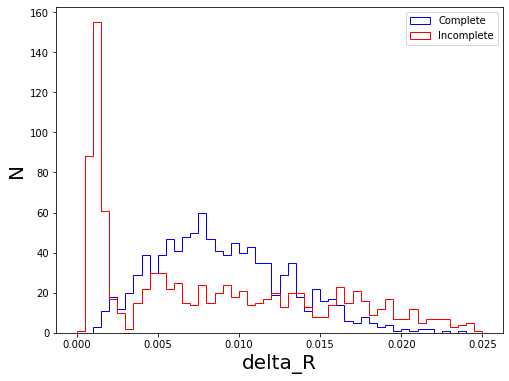

In [12]:
plt.figure(figsize=(8,6))
ranges=(0,0.025)
plt.hist(comShowerShapes[:,-2], histtype="step",bins=50,range=ranges, color='b',label='Complete')
plt.hist(incShowerShapes[:,-2], histtype="step",bins=50,range=ranges, color='r',label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("delta_R",fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(0,0.01)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

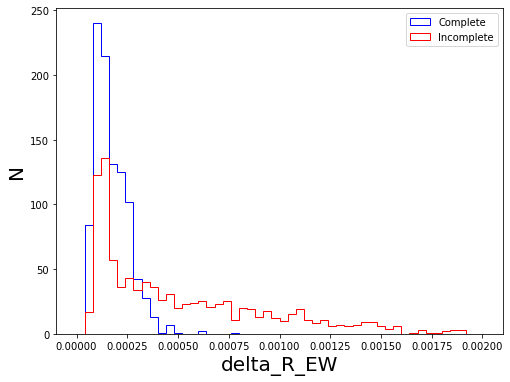

In [13]:
plt.figure(figsize=(8,6))
ranges=(0,0.002)
plt.hist(comShowerShapes[:,-1], histtype="step",bins=50,range=ranges, color='b',label='Complete')
plt.hist(incShowerShapes[:,-1], histtype="step",bins=50,range=ranges, color='r',label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("delta_R_EW",fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(0,0.01)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

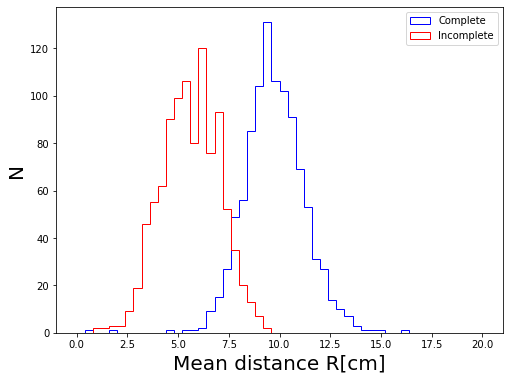

In [25]:
plt.figure(figsize=(8,6))
ranges=(0,20)
plt.hist(comShowerShapes[:,2], histtype="step",bins=50,range=ranges, color='b',label='Complete')
plt.hist(incShowerShapes[:,2], histtype="step",bins=50,range=ranges, color='r',label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Mean distance R[cm]",fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(0,0.01)
#if(savefigs):
plt.savefig("/eos/user/d/dmagdali/figures/"+"dataLayerCut_incE100vscomE50_meanDistanceR.png")
plt.show()

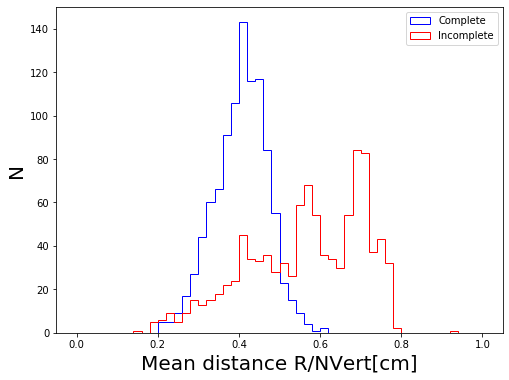

In [39]:
plt.figure(figsize=(8,6))
ranges=(0,1)
plt.hist(comShowerShapes[:,-1], histtype="step",bins=50,range=ranges, color='b',label='Complete')
plt.hist(incShowerShapes[:,-1], histtype="step",bins=50,range=ranges, color='r',label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Mean distance R/NVert[cm]",fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(0,0.01)
#if(savefigs):
plt.savefig("/eos/user/d/dmagdali/figures/"+"dataLayerCut_incE100vscomE50_meanDistanceRdivNVert.png")
#plt.show()

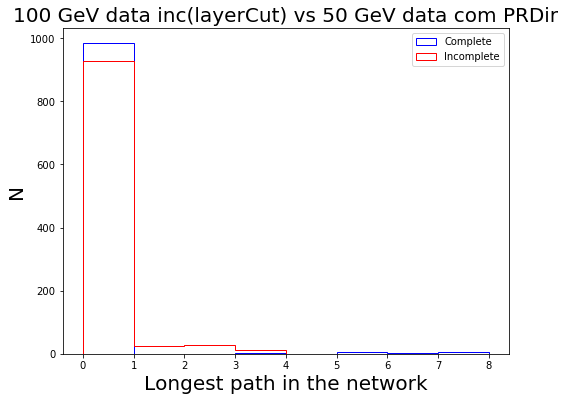

In [14]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,0], bins=(max(longestComPaths[:,0])-min(longestComPaths[:,0])), color='b', histtype="step",label='Complete')
plt.hist(longestInComPaths[:,0], bins=(max(longestInComPaths[:,0])-min(longestInComPaths[:,0])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPath.png")
plt.show()

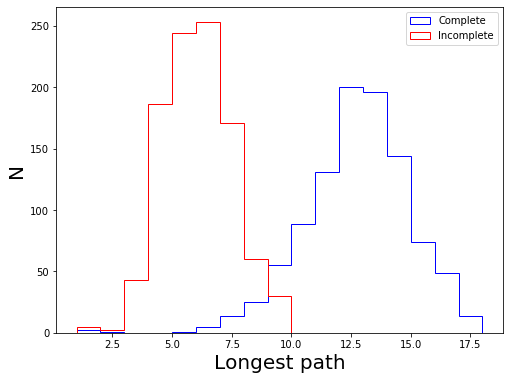

In [18]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,1], bins=(max(longestComPaths[:,1])-min(longestComPaths[:,1])), color='b', histtype="step",label='Complete')
plt.hist(longestInComPaths[:,1], bins=(max(longestInComPaths[:,1])-min(longestInComPaths[:,1])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path",fontsize=20)
#plt.title(datasetName+" PRUndir",fontsize=20)
#if(savefigs):
plt.savefig("/eos/user/d/dmagdali/figures/"+"dataLayerCut_incE100vscomE50_nEdg1_PRUnDirCen_longestPath.png")
#plt.show()

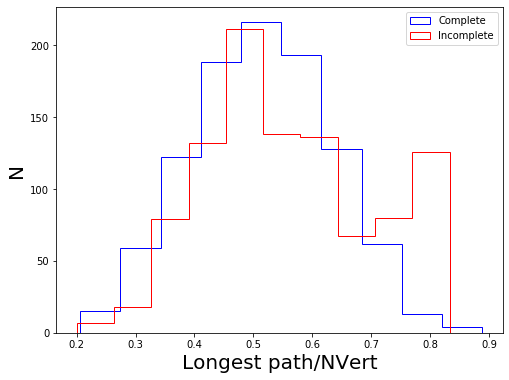

In [40]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,3], bins=10, color='b', histtype="step",label='Complete')
plt.hist(longestInComPaths[:,3], bins=10, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path/NVert",fontsize=20)
#plt.title(datasetName+" PRUndir",fontsize=20)
#if(savefigs):
plt.savefig("/eos/user/d/dmagdali/figures/"+"dataLayerCut_incE100vscomE50_nEdg1_PRUnDirCen_longestPathdivNVert.png")
#plt.show()

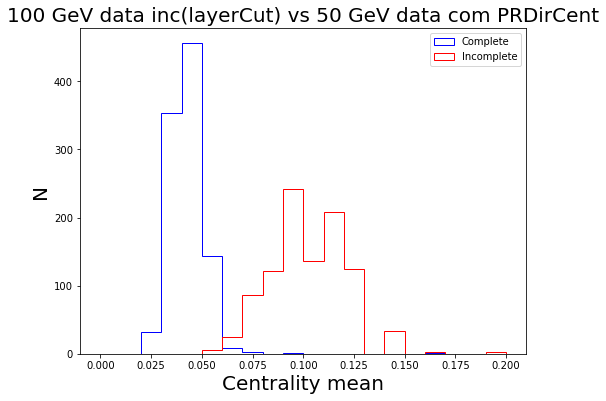

In [17]:
%matplotlib inline
centralityName="PRDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,0], bins=20,range=(0,0.2), color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,0], bins=20,range=(0,0.2), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality mean",fontsize=20)
plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_mean.png")
plt.show()

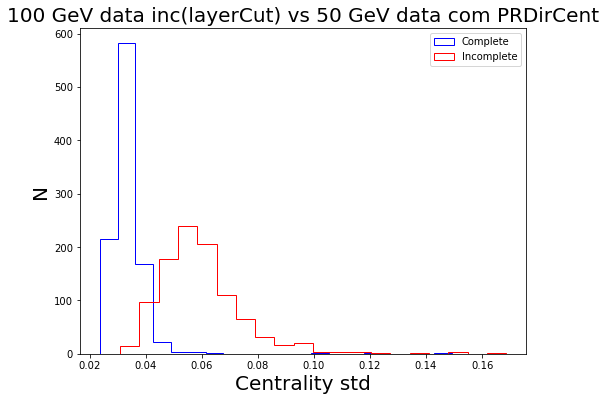

In [50]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,1], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,1], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality std",fontsize=20)
plt.title(datasetName+" "+centralityName,fontsize=20)
#plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_std.png")
plt.show()

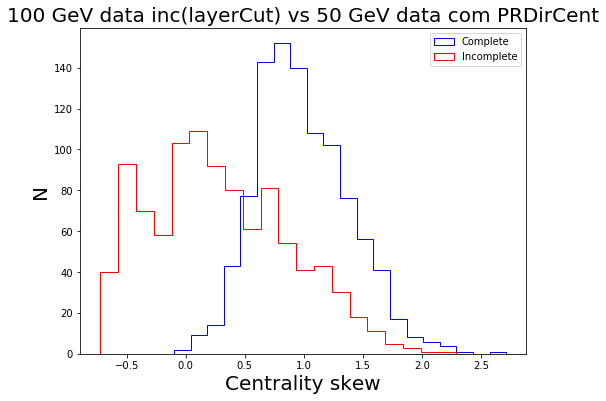

In [51]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,2], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,2], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality skew",fontsize=20)
plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_skew.png")
plt.show()

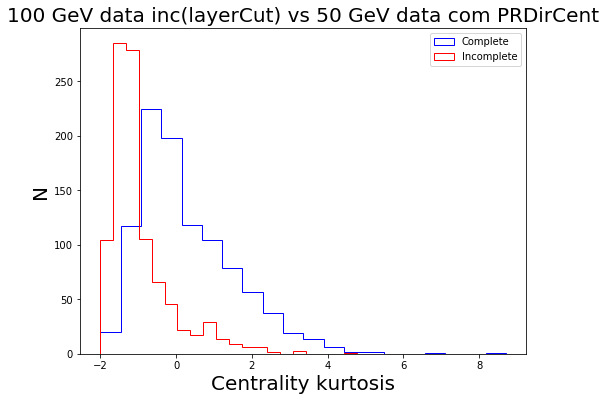

In [52]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,3], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,3], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality kurtosis",fontsize=20)
plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_kurtosis.png")
plt.show()

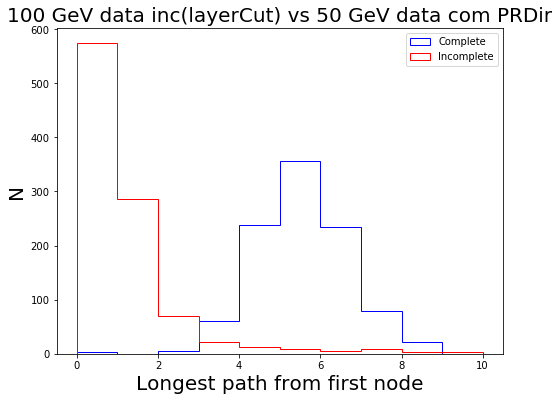

In [53]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPathsFirstNode[:,0], bins=(max(longestComPathsFirstNode[:,0])-min(longestComPathsFirstNode[:,0])), color='b', histtype="step",label='Complete')
plt.hist(longestInComPathsFirstNode[:,0], bins=(max(longestInComPathsFirstNode[:,0])-min(longestInComPathsFirstNode[:,0])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path from first node",fontsize=20)
plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPathFirstNode.png")
plt.show()

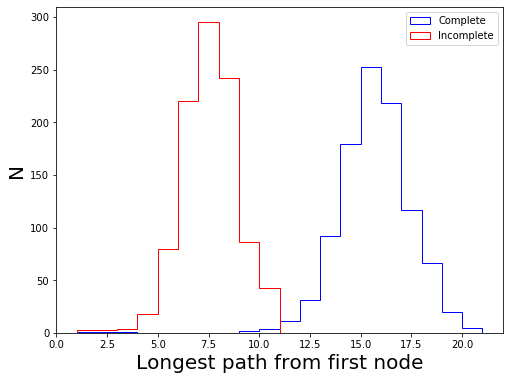

In [19]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPathsFirstNode[:,1], bins=(max(longestComPathsFirstNode[:,1])-min(longestComPathsFirstNode[:,1])), color='b', histtype="step",label='Complete')
plt.hist(longestInComPathsFirstNode[:,1], bins=(max(longestInComPathsFirstNode[:,1])-min(longestInComPathsFirstNode[:,1])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path from first node",fontsize=20)
#plt.title(datasetName+" PRUndir",fontsize=20)
plt.savefig("/eos/user/d/dmagdali/figures/"+"dataLayerCut_incE100vscomE50_nEdg1_PRUnDirCen_longestPathFirstNode.png")
#plt.show()

In [55]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [12]:
def plotEvent(indexes,x,y,z,E,heatmap="energy",nEdg=1,saveString=""):

    #print(f"Raw_Energy={ak.sum(E,axis=1)}")
    #reg_energy=tracksters["regressed_energy"].array()[nEvent]
    #print(f"Regressed_Energy={reg_energy}")
    #print(f"Number of nodes={ak.count(indexes,axis=1)}")
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
        
    edges_1 = fn.edgeBuilderNew(indexes,x,y,z,E,nEdg)
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    if(heatmap=="centrality"):
        heatmapVals=fn.nXCentralityPageRank(indexes,edges_1,True)
    elif(heatmap=="energy"):
        heatmapVals=E
    yg =ax.scatter(x, y, z, marker='o') 
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    if len(heatmapVals) > 0 :
        colmap.set_array(heatmapVals)
        yg = ax.scatter(x, y, z, c=cm.viridis(heatmapVals/max(heatmapVals)), marker='o', linewidth=2)
        cb = fig.colorbar(colmap,label="PageRank "+heatmap)
    else:
        yg =ax.scatter(x, y, z, marker='o') 

    if len(heatmap) > 0:

        for ind in edges_1:
            idx0 = ak.where(indexes == ind.to_list()[0])[0][0]
            idx1 = ak.where(indexes == ind.to_list()[1])[0][0]
            ax.plot(
                [x[idx0] ,x[idx1]],
                [y[idx0] ,y[idx1]],
                [z[idx0] ,z[idx1]],
                'black'
            )
    
    if(saveString!=""):
        plt.savefig("/eos/user/d/dmagdali/figures/"+saveString)
    else:
        plt.show()

43.965130656957626
46.033941734582186


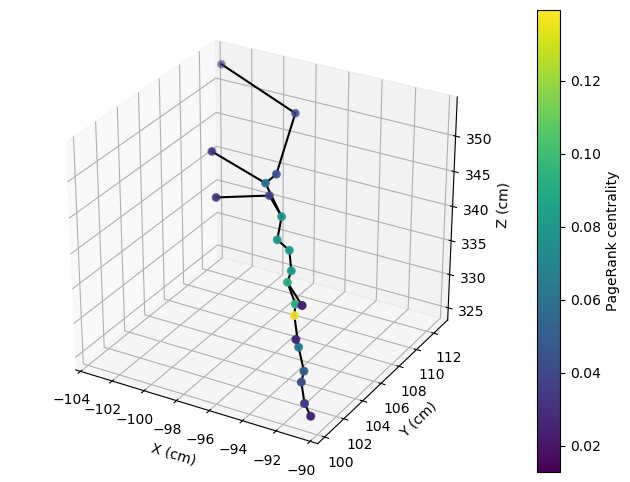

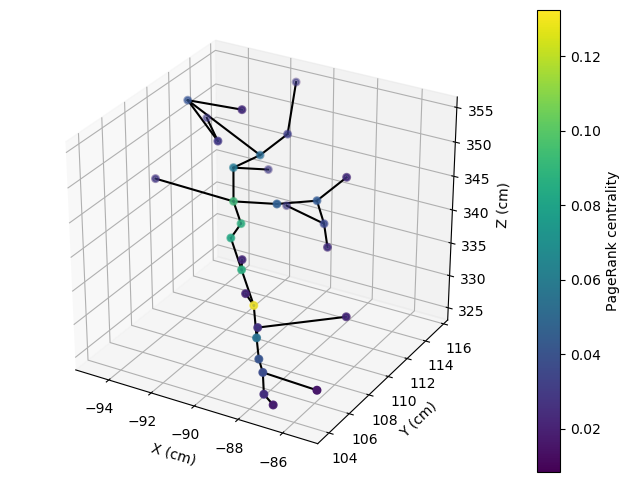

In [14]:
plt.style.use("default")
for evt in [40]:
    for tr in range(min(len(vertices_indexes[evt]),2)):
        v_layers=vertices_layers[evt][tr]
        v_ind=vertices_indexes[evt][tr]
        v_x=vertices_x[evt][tr]
        v_y=vertices_y[evt][tr]
        v_z=vertices_z[evt][tr]
        v_E=vertices_E[evt][tr] 
        print(ak.sum(v_E))
        saveString=f"LayerCutCompleteEvent{evt}_tr{tr}_E50D5_nEdg1_Energy"+"{:.2f}_CentralityHeatmap.png".format(ak.sum(v_E))
        plotEvent(v_ind,v_x,v_y,v_z,v_E,"centrality",1,saveString)
        #plt.savefig("/eos/user/d/dmagdali/figures/"+f"LayerCutCompleteEvent{evt}_tr{tr}_E50D5_nEdg1_Energy"+"{:.2f}.png".format(ak.sum(v_E)))
        #plt.show()

53.98987579345703
55.85526490211487


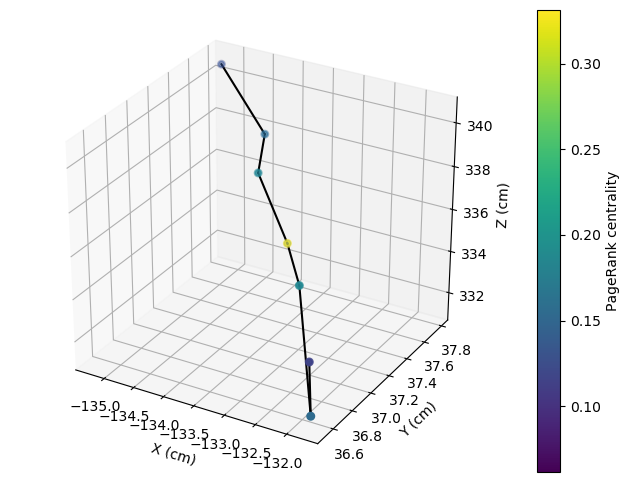

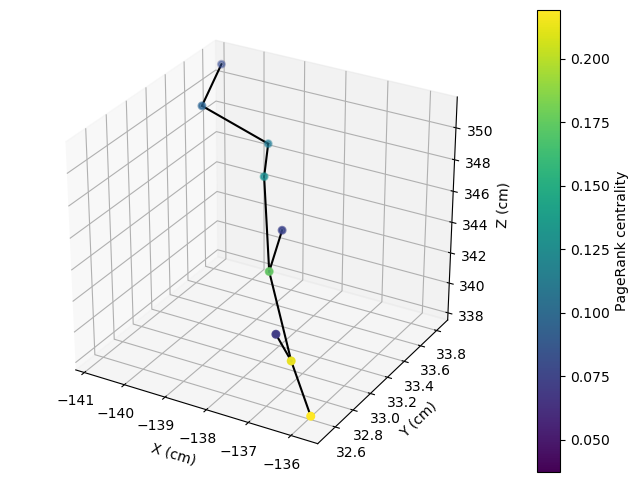

In [15]:
plt.style.use("default")
for evt in [243]:
    for tr in range(min(len(vertices_indexes_50[evt]),2)):
        incSlice=fn.incompleteTracksters(vertices_layers_50[evt,tr],0.31,0.01)

        v_ind_inc=vertices_indexes_50[evt,tr][incSlice]
        v_x_inc=vertices_x_50[evt,tr][incSlice]
        v_y_inc=vertices_y_50[evt,tr][incSlice]
        v_z_inc=vertices_z_50[evt,tr][incSlice]
        v_E_inc=vertices_E_50[evt,tr][incSlice]
        print(ak.sum(v_E_inc))
        saveString=f"LayerCutInCompleteEvent{evt}_tr{tr}_E100D5_nEdg1_Energy"+"{:.2f}_CentralityHeatmap.png".format(ak.sum(v_E_inc))
        plotEvent(v_ind_inc,v_x_inc,v_y_inc,v_z_inc,v_E_inc,"centrality",1,saveString)
        